# Clean and analyze 'tools and technologies for social sciences'

Steps:
- [x] insert the current dataset into a pandas data frame
- [x] wordcloud for all the competitive clusters
- [x] map tools by year, diversity, and charge
- [x] map tools by geo
- who's behind the tools: pivot individual vs public sector vs private
- save files per cluster, start with: [x] text mining 2) survey analysis 3) qualitative + annotations



In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('master_tools_current.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Name                                         517 non-null    object 
 1   Pitch                                        513 non-null    object 
 2   URL                                          509 non-null    object 
 3   Link_Status                                  515 non-null    object 
 4   Technique                                    305 non-null    object 
 5   Competitive_Cluster                          517 non-null    object 
 6   Interfaces_With                              122 non-null    object 
 7   Company_Founder_Developer                    409 non-null    object 
 8   Key_Person                                   409 non-null    object 
 9   Key_Person_Gender                            411 non-null    object 
 10  Fu

In [30]:
tools_df = df.drop(["Link_Status", "Strengths", "Weaknesses", "Notes", "usage_metrics_varied", "additional_info", "type_of_data", "discipline", "ocean_mentions"], axis=1)

In [31]:
tools_df.columns = tools_df.columns.str.lower()

tools_df.head()

,name,pitch,url,technique,competitive_cluster,interfaces_with,company_founder_developer,key_person,key_person_gender,funders_investors,country,year_founded,charges_academic,license,stage,ownership_type,papers,suggested_citation,estimated_price_for_academic_customer_annum,estimated_citations
0,a.nnotate,"online annotation, collaboration and indexing ...",http://a.nnotate.com,web,annotation,NaN,Textensor Limited,Robert Cannon,M,NaN,UK,2014,Paid,NaN,Plateau,Private,NaN,NaN,600,30.0
1,Alveo,on-line infrastructure for accessing human com...,http://alveo.edu.au/,NaN,data source,Voyant tools,University of Western Sydney,Denis Burnham,M,National eResearch Collaboration Tools and Res...,Australia,2012,Free,NaN,Project,Public sector,NaN,NaN,0,NaN
2,Anafora,"a web-based, lightweight, flexible annotation ...",https://github.com/weitechen/anafora,text,annotation,NaN,University of Colorado,Wei-Te Chen,M,NaN,USA,2012,Free,NaN,Plateau,Public sector,NaN,NaN,0,7.0
3,ANNIS,web browser-based search and visualization arc...,http://corpus-tools.org/annis/,visualise annotated text,data visualisation,NaN,Humboldt-Universitat zu Berlin,Thomas Krause & Amir Zeldes,MM,NaN,Germany,2016,Free,NaN,Plateau,Public sector,NaN,NaN,0,NaN
4,Annotation Studio,suite of collaborative web-based annotation to...,https://www.annotationstudio.org/,text,annotation,NaN,MIT HyperStudio,Jim Paradis & Kurt Fendt,MM,National Endowment for Humanities; MIT SHASS T...,USA,2013,Free,NaN,Project,Public sector,NaN,NaN,0,NaN


### Overview of all the tools by competitive cluster
- all the competitive clusters we have identified
- wordcloud of competitive clusters

In [4]:
tools_df['competitive_cluster'].nunique()
tools_df['competitive_cluster'].unique()

array(['annotation', 'data source', 'data visualisation', 'text mining',
       'crowdfunding', 'qualitative data analysis',
       'Collaboration and discovery', 'citizen science', 'data analysis',
       'data management', 'mapping', 'digital collection management',
       'experiments', 'surveys', 'social media', 'literature review',
       'ML platform', 'news credibility', 'notebook', 'PDF extraction',
       'publish', 'publish observations', 'publish software',
       'Recruit participants & crowd experiments', 'data cleaning',
       'collect data', 'reporting', 'reproducibility',
       'audio speech mining', 'network visualization', 'research design',
       'software solutions', 'reverse data visualisation',
       'search for data', 'share research', 'software management',
       'statistical analysis', 'discovery', 'time visualisation',
       'computational models', 'video production', 'web scraping', 'ML',
       'data mining', 'AR & VR', 'skills', 'research management',

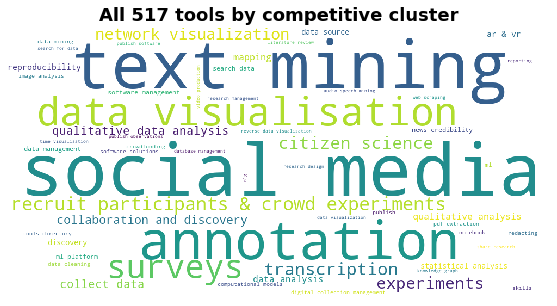

In [5]:
from wordcloud import WordCloud
from collections import Counter

tools_df['competitive_cluster'] = tools_df['competitive_cluster'].str.lower()
cluster_size=Counter(tools_df['competitive_cluster'])

wordcloud_clusters = WordCloud(
    width = 1000, 
    height = 500, 
    background_color = 'white').generate_from_frequencies(cluster_size)

fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'w',
    edgecolor = 'k')

x = tools_df['competitive_cluster'].count()

plt.title('All {} tools by competitive cluster'.format(x), fontdict={'fontweight':'bold', 'fontsize': 18})
plt.imshow(wordcloud_clusters)
plt.axis("off")

plt.savefig('images/tools_by_cluster.png', dpi=300)
plt.show()

### All tools by charge to researchers

In [6]:
#prepping for the plot
tools_df.year_founded = pd.to_datetime(tools_df.year_founded, format='%Y', errors='ignore')
tools_df.sort_values('year_founded', ascending=True)

#using pivot table
pivot_charge = tools_df.pivot_table(values='name', index='year_founded', columns='charges_academic', aggfunc='count', fill_value=0)
#pivot_charge.plot()

#get running totals
pivot_charge_totals = pivot_charge.cumsum(axis=0)
pivot_charge_totals['all'] = pivot_charge_totals.sum(axis=1)
#pivot_charge_totals.plot()


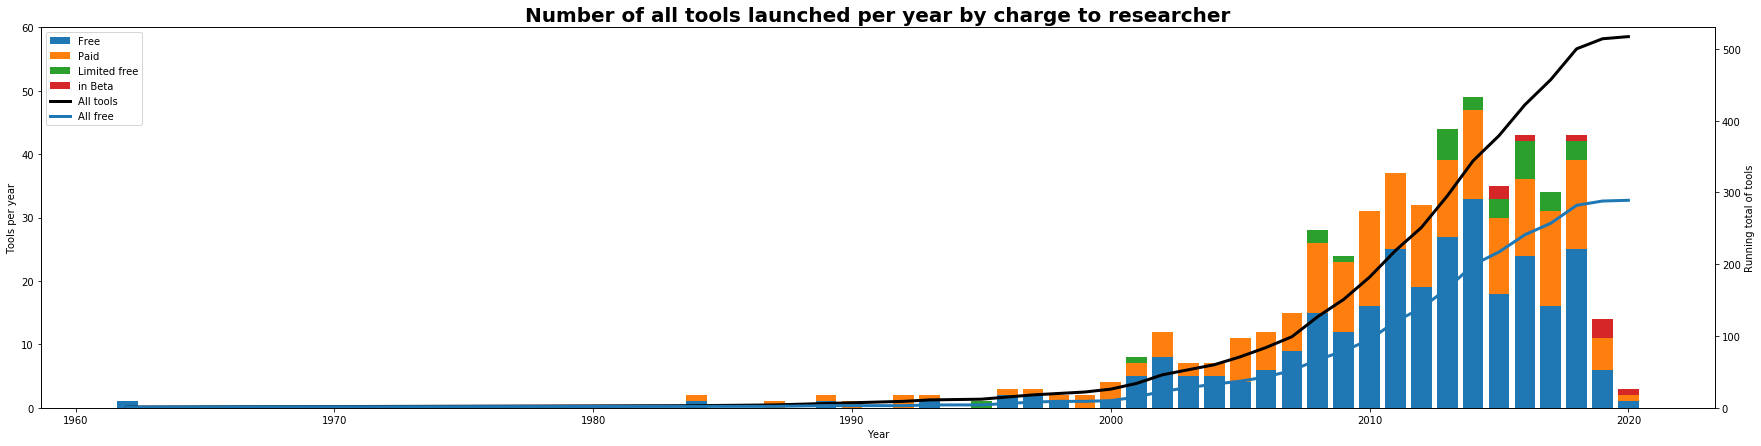

In [8]:
#plotting with matplotlib in order to keep the years to scale rather than keep year_founded as categorical

fig1, axt1 = plt.subplots(figsize=(30, 7))

#plt.bar(pivot_charge.index.year, pivot_charge['Free'])
axt1.bar(pivot_charge.index.year, pivot_charge['Free'], label='Free')
axt1.bar(pivot_charge.index.year, pivot_charge['Paid'], bottom=pivot_charge['Free'], label='Paid')
axt1.bar(pivot_charge.index.year, pivot_charge['Limited free'], bottom=[x+y for x,y in zip(pivot_charge['Free'],pivot_charge['Paid'])], label='Limited free')
axt1.bar(pivot_charge.index.year, pivot_charge['in beta'], bottom=[x+y+z for x,y,z in zip(pivot_charge['Free'],pivot_charge['Paid'],pivot_charge['Limited free'])], label='in Beta')

axt2 = axt1.twinx()

axt2.plot(pivot_charge_totals.index.year, pivot_charge_totals['all'], label='All tools', linewidth=3.0, c='k')
axt2.plot(pivot_charge_totals.index.year, pivot_charge_totals['Free'], label='All free', linewidth=3.0)

axt1.set_xlabel('Year')
axt1.set_ylabel('Tools per year')
axt2.set_ylabel('Running total of tools')

axt1.set_ylim(0,60)
axt2.set_ylim(0,530)


linest1, labelst1 = axt1.get_legend_handles_labels()
linest2, labelst2 = axt2.get_legend_handles_labels()
axt2.legend(linest1 + linest2, labelst1 + labelst2, loc=0)

plt.title('Number of all tools launched per year by charge to researcher', fontdict={'fontweight':'bold', 'fontsize': 20})

plt.savefig('images/tools_per_year_and_charge.png', dpi=300)
plt.show()



## Gender diversity in leadership teams

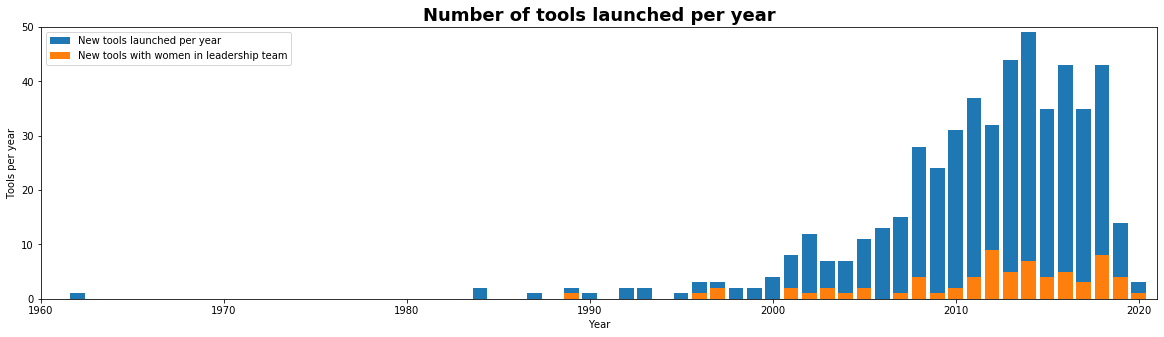

In [9]:
#count totals per year
tools_df['yearly_total'] = tools_df.groupby('year_founded')["name"].transform('count')

#compute yearly total where women in leadership
tools_df['women'] = tools_df.key_person_gender.str.contains("W")
tools_df['women_total'] = tools_df.groupby('year_founded')["women"].transform('sum')

#now plot all
plt.figure(figsize=(20,5))
plt.bar(tools_df.year_founded.dt.year, tools_df.yearly_total, label='New tools launched per year')
plt.axis([1960, 2021, 0, 50])

plt.title('Number of tools launched per year', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.xlabel('Year')
plt.ylabel('Tools per year')


plt.bar(tools_df.year_founded.dt.year, tools_df.women_total, label='New tools with women in leadership team')

plt.legend(loc='upper left')

plt.savefig('images/tools_per_year_and_diversity.png', dpi=300)
plt.show()


### Tools by structure and charge

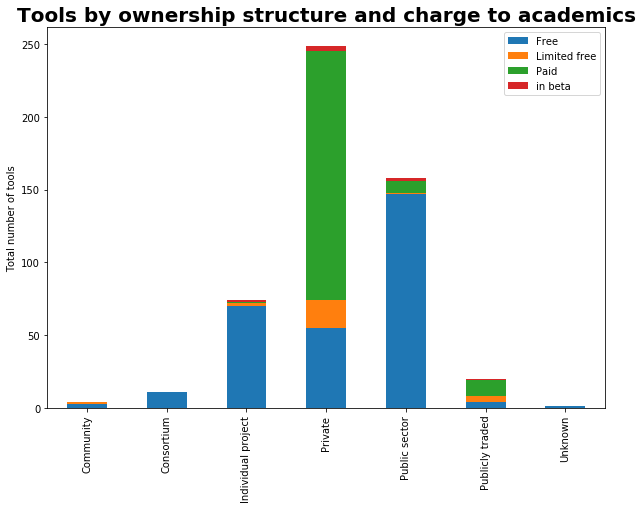

In [43]:
#using pivot table
pivot_structure = tools_df.pivot_table(values='name', index='ownership_type', columns='charges_academic', aggfunc='count', fill_value=0)
pivot_structure.plot.bar(stacked=True, figsize=(10,7))

plt.title('Tools by ownership structure and charge to academics', fontdict={'fontweight':'bold', 'fontsize': 20})
plt.xlabel('')
plt.ylabel('Total number of tools')
plt.legend()

plt.savefig('images/tools_by_structure.png', dpi=300)
plt.show()

## Map tools by geo region

In [10]:
from geonamescache import GeonamesCache

#any countries that cannot be mapped?
countries = GeonamesCache().get_countries_by_names()
sorted(set(tools_df.country.unique()) - set(countries.keys()))

['Czech Republic', 'Hawaii', 'UK', 'USA']

In [11]:
#map country names to codes
from geonamescache.mappers import country

mapper = country(from_key='name', to_key='iso3')

country_index = {}
country_index['Czech Republic'] = 'CZE'
country_index['UK'] = 'GBR'
country_index['Hawaii'] = 'USA'
country_index['USA'] = 'USA'

tools_df['iso3'] = tools_df.country.apply(lambda x: country_index.get(x, mapper(x)))
assert all(~tools_df['iso3'].isna())
tools_df.head()
tools_df.loc[tools_df.country == 'Argentina']

,name,pitch,url,technique,competitive_cluster,interfaces_with,company_founder_developer,key_person,key_person_gender,funders_investors,...,stage,ownership_type,papers,suggested_citation,estimated_price_for_academic_customer_annum,estimated_citations,yearly_total,women,women_total,iso3


In [12]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #.to_crs('+proj=robin')
world = world[world.name != 'Antarctica']

#replace some codes which are coming up as erros or -99 from the gpd file
short_mapper = {'France': 'FRA', 'Norway': 'NOR', 'Somaliland': 'SOM', 'N. Cyprus': 'CYP', 'Kosovo': 'RKS'}
world.loc[world.iso_a3 == '-99', 'iso_a3'] = world[world.iso_a3 == '-99'].name.map(short_mapper)


#world.head()
world.loc[world.iso_a3.str.contains('-')]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry


In [13]:
tool_counts = tools_df.iso3.value_counts()
tool_counts.name = 'tools_country'
world = world.join(tool_counts, on='iso_a3')
world.tools_country = world.tools_country.astype(int, errors='ignore')
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 0 to 176
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   pop_est        176 non-null    int64   
 1   continent      176 non-null    object  
 2   name           176 non-null    object  
 3   iso_a3         176 non-null    object  
 4   gdp_md_est     176 non-null    float64 
 5   geometry       176 non-null    geometry
 6   tools_country  35 non-null     float64 
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 11.0+ KB


In [14]:
world.tools_country

0        NaN
1        NaN
2        NaN
3       19.0
4      263.0
       ...  
172      NaN
173      NaN
174      NaN
175      NaN
176      NaN
Name: tools_country, Length: 176, dtype: float64

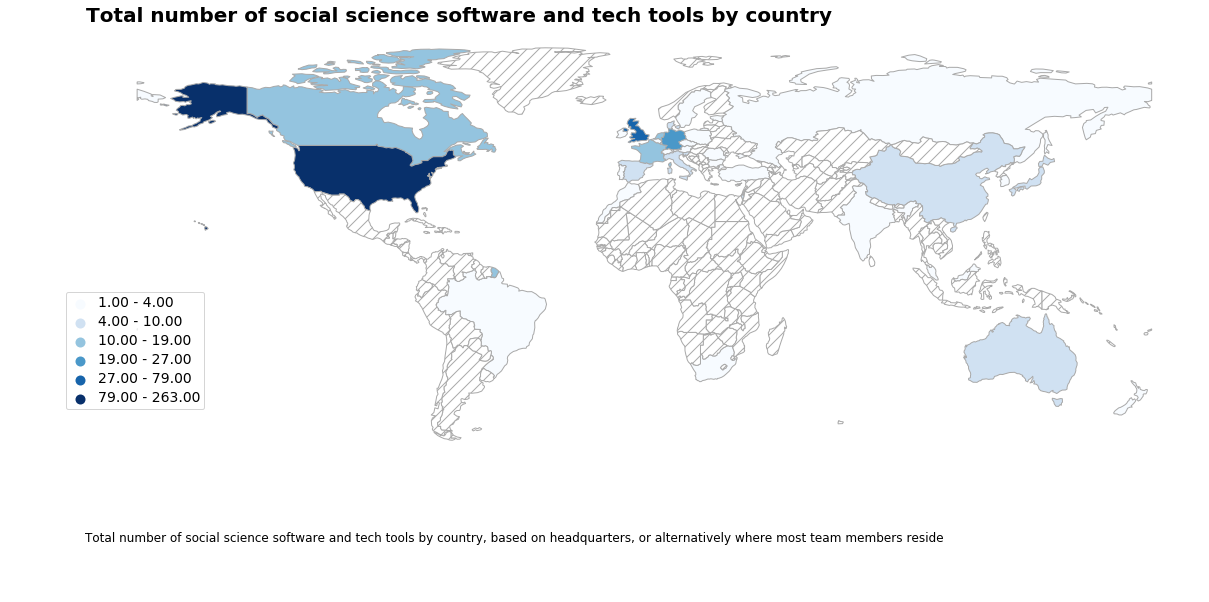

In [15]:
import mapclassify


#create two dataframes, so the countries not covered aren't colored in the plot
known = world.dropna(subset=['tools_country'])
unknown = world[world['tools_country'].isna()]


ax = known.plot(column='tools_country', cmap='Blues', scheme='fisher_jenks', k=6, figsize=(20, 12), legend=True, edgecolor='#aaaaaa')
unknown.plot(ax=ax, color='#ffffff', hatch='//', edgecolor='#aaaaaa')

ax.set_title('Total number of social science software and tech tools by country', fontdict={'fontweight':'bold', 'fontsize': 20}, loc='left')
description = '''Total number of social science software and tech tools by country, based on headquarters, or alternatively where most team members reside'''.strip()
ax.annotate(description, xy=(0.07, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
legend = ax.get_legend()
legend.set_bbox_to_anchor((.11, .4))

legend.prop.set_size(14)

plt.savefig('images/tools_by_country.png', dpi=300)

### Break down file into smaller files to analyze each cluster

(also useful for rendering each cluster into html tables on their respective pages)

Pick out the tools for Text Mining, Surveys, Annotation & Qual analysis

In [469]:
text_mining_df = tools_df.loc[(tools_df['competitive_cluster'] == 'text mining')]
text_mining_df.reset_index(drop=True, inplace=True)
text_mining_df.sort_values('year_founded', ascending=True)
#text_mining_df.head()

text_mining_df.to_csv('text_mining.csv')